# Veri Setinin Hazırlanması Ve Gözlemlenmesi

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# ARD GRUP BİLİŞİM TEKNOLOJİLERİ hissesi için son 5 yıllık verileri çekme
ard = yf.Ticker("ARDYZ.IS")
data = ard.history(period="5y")

In [ ]:
# İlk birkaç satırı görüntüleme
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-06 00:00:00+03:00,0.889108,0.889108,0.889108,0.889108,603177,0.0,0.0
2020-02-07 00:00:00+03:00,1.066651,1.066651,1.066651,1.066651,1430257,0.0,0.0
2020-02-10 00:00:00+03:00,1.279142,1.279142,1.279142,1.279142,38465934,0.0,0.0
2020-02-11 00:00:00+03:00,1.397970,1.534972,1.335062,1.534972,172486525,0.0,0.0
2020-02-12 00:00:00+03:00,1.576910,1.841127,1.565727,1.841127,92204277,0.0,0.0


In [ ]:
data.tail() # verinin son satırlarını gözlemliyoruz

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-19 00:00:00+03:00,41.959999,42.220001,40.400002,42.220001,2773364,0.0,0.0
2024-12-20 00:00:00+03:00,42.099998,42.240002,40.680000,41.540001,1944073,0.0,0.0
2024-12-23 00:00:00+03:00,41.599998,41.939999,40.060001,40.139999,1981307,0.0,0.0
2024-12-24 00:00:00+03:00,40.139999,40.580002,38.380001,40.200001,3721237,0.0,0.0
2024-12-25 00:00:00+03:00,40.599998,40.980000,39.900002,40.980000,1551511,0.0,0.0


In [ ]:
data.info() # veri setine ait istatistiksel bilgiler

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1222 entries, 2020-02-06 00:00:00+03:00 to 2024-12-25 00:00:00+03:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1222 non-null   float64
 1   High          1222 non-null   float64
 2   Low           1222 non-null   float64
 3   Close         1222 non-null   float64
 4   Volume        1222 non-null   int64  
 5   Dividends     1222 non-null   float64
 6   Stock Splits  1222 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 76.4 KB


# Veri Görselleştirme

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

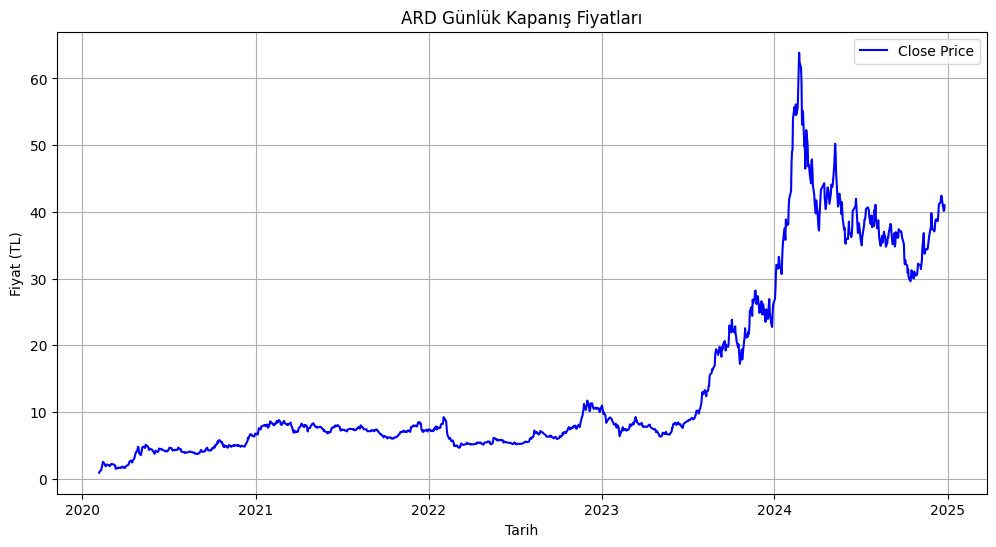

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.title('ARD Günlük Kapanış Fiyatları')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (TL)')
plt.legend()
plt.grid(True)
plt.show()

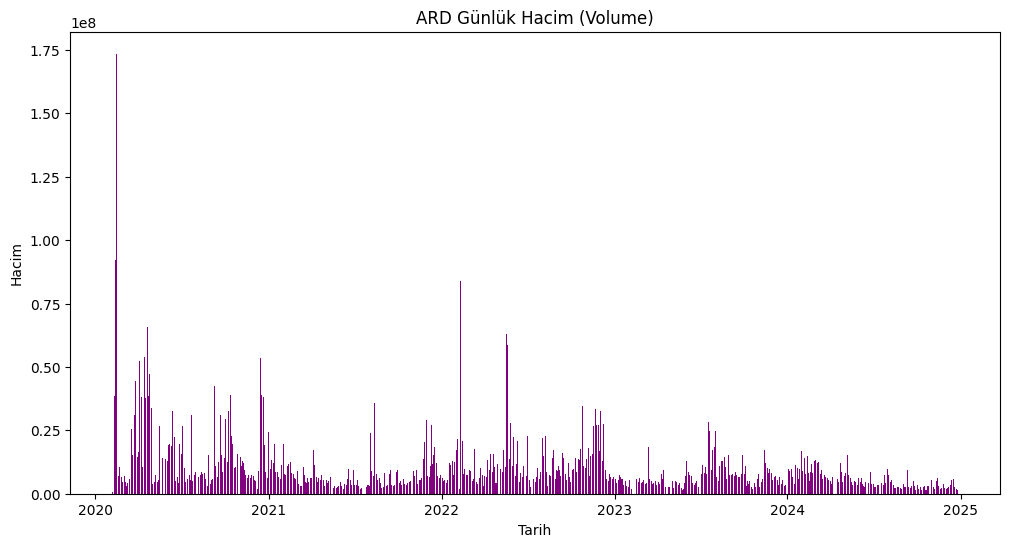

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(data.index, data['Volume'], color='purple', width=1.0)
plt.title('ARD Günlük Hacim (Volume)')
plt.xlabel('Tarih')
plt.ylabel('Hacim')
plt.show()

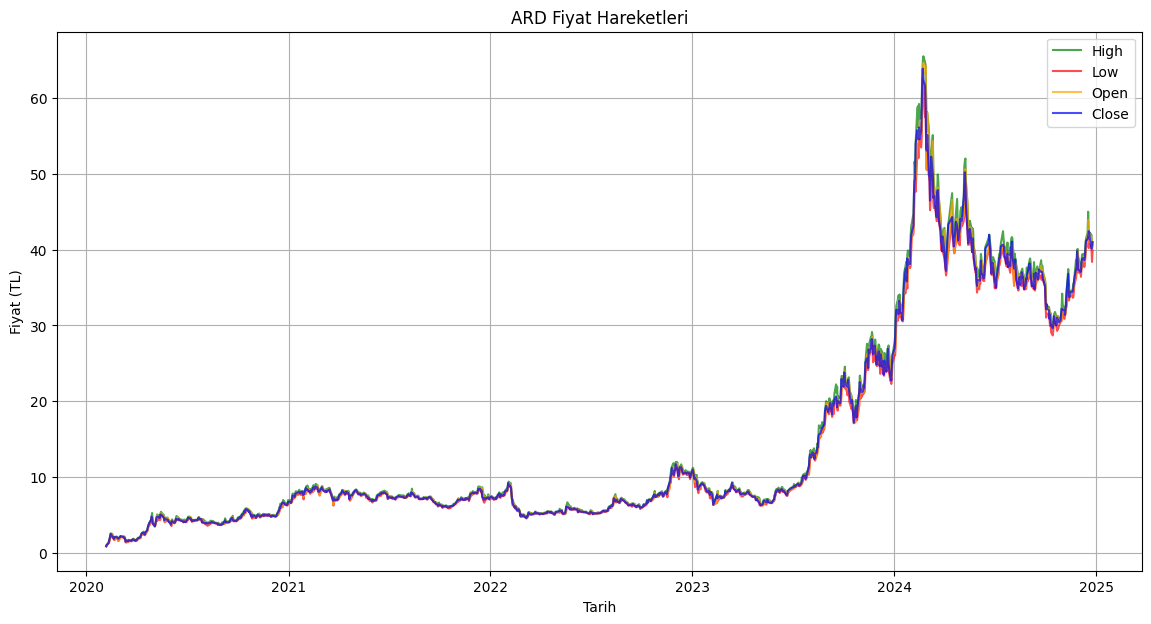

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['High'], label='High', color='green', alpha=0.7)
plt.plot(data.index, data['Low'], label='Low', color='red', alpha=0.7)
plt.plot(data.index, data['Open'], label='Open', color='orange', alpha=0.7)
plt.plot(data.index, data['Close'], label='Close', color='blue', alpha=0.7)
plt.title('ARD Fiyat Hareketleri')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (TL)')
plt.legend()
plt.grid(True)
plt.show()

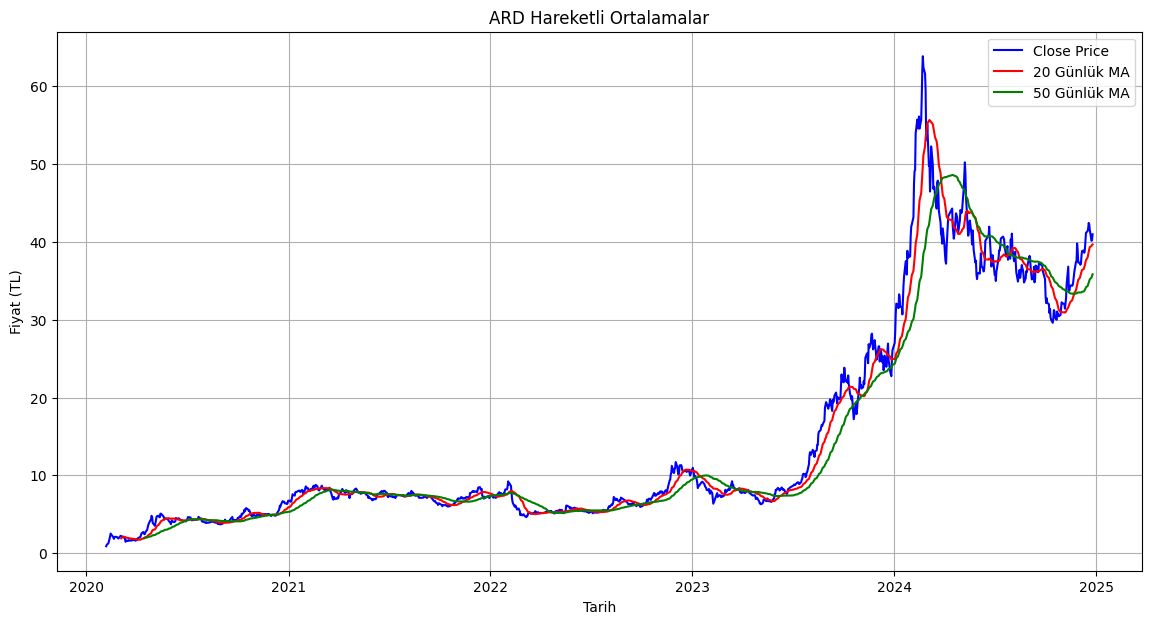

In [ ]:
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['MA_20'], label='20 Günlük MA', color='red')
plt.plot(data.index, data['MA_50'], label='50 Günlük MA', color='green')
plt.title('ARD Hareketli Ortalamalar')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (TL)')
plt.legend()
plt.grid(True)
plt.show()

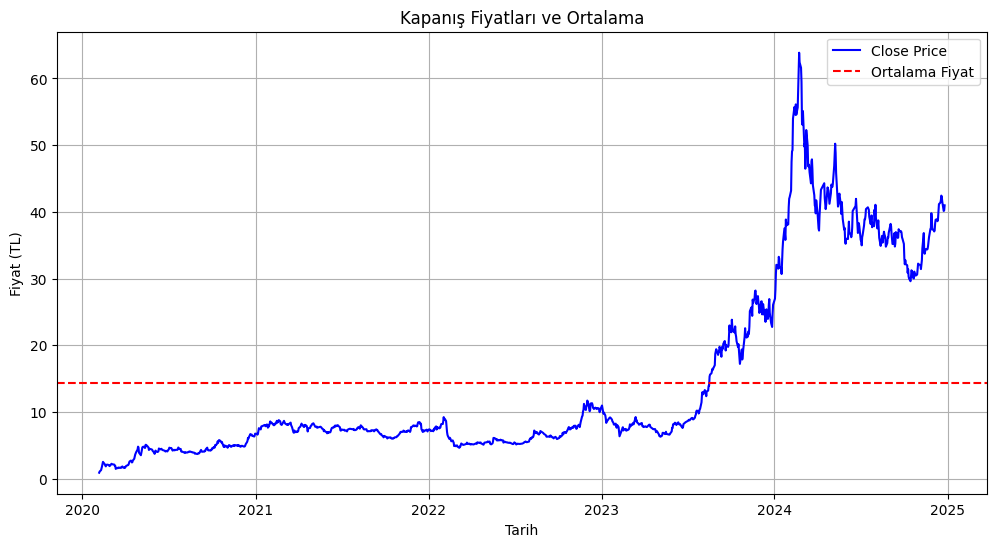

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.axhline(y=data['Close'].mean(), color='red', linestyle='--', label='Ortalama Fiyat')
plt.title('Kapanış Fiyatları ve Ortalama')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (TL)')
plt.legend()
plt.grid(True)
plt.show()

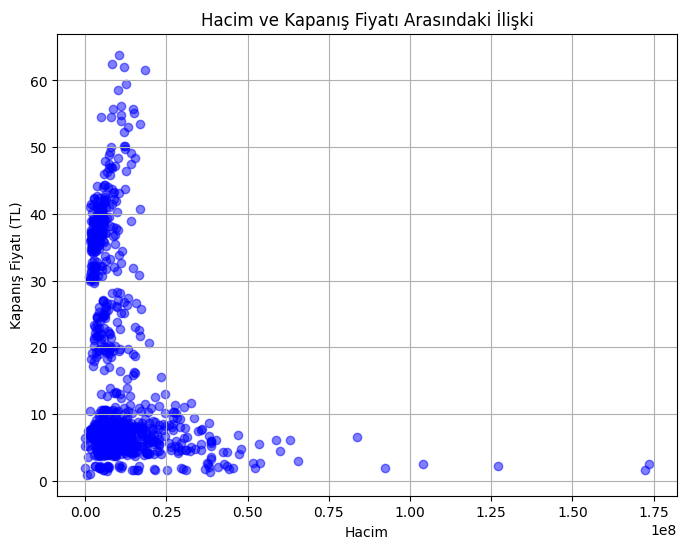

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Volume'], data['Close'], alpha=0.5, color='blue')
plt.title('Hacim ve Kapanış Fiyatı Arasındaki İlişki')
plt.xlabel('Hacim')
plt.ylabel('Kapanış Fiyatı (TL)')
plt.grid(True)
plt.show()

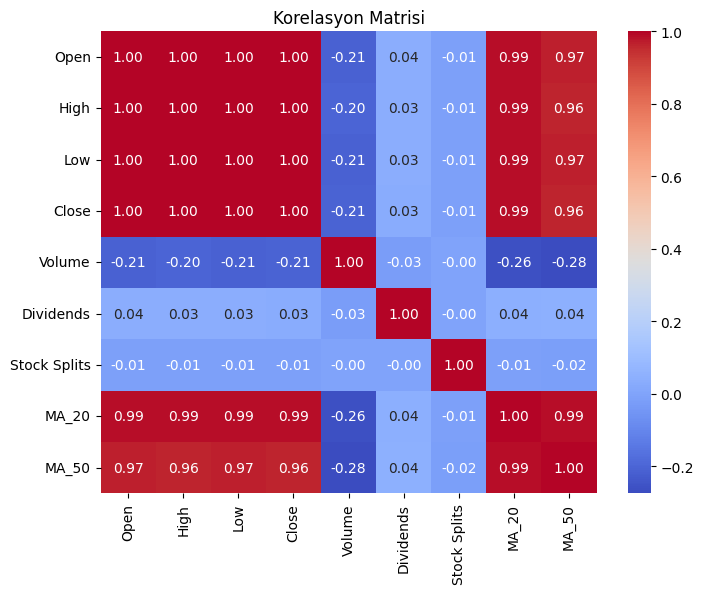

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.show()

# Veri Ön İşleme

In [ ]:
# Gerekli sütunları seçme (Open ve Close)
data = data[['Open', 'Close']]

In [ ]:
# Açılış-Kapanış Ortalamasını Hesaplama
data['average_price'] = (data['Open'] + data['Close']) / 2

In [ ]:
# Veriyi Zaman Serisi Formatına Çevirme
data.index = pd.to_datetime(data.index)

In [ ]:
data['target'] = data['average_price'].shift(-1) # Denetimli makine öğrenmesi şekline döüştürüyoruz

In [ ]:
# Eksik veriler varsa kaldırıyoruz
data.dropna(inplace=True)

In [ ]:
data.tail()

,Open,Close,average_price,target
Date,,,,
2024-12-18 00:00:00+03:00,41.700001,42.439999,42.070000,42.090000
2024-12-19 00:00:00+03:00,41.959999,42.220001,42.090000,41.820000
2024-12-20 00:00:00+03:00,42.099998,41.540001,41.820000,40.869999
2024-12-23 00:00:00+03:00,41.599998,40.139999,40.869999,40.170000
2024-12-24 00:00:00+03:00,40.139999,40.200001,40.170000,40.789999


# Modelleme

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,make_scorer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

In [ ]:
# Özellikleri ve hedefi ayırma
X = data[['average_price']].values
y = data['target'].values

In [ ]:
# Veriyi standartlaştırma
scaler = StandardScaler() # Veri Ön İşleme Adımlarından
X_scaled = scaler.fit_transform(X)

In [ ]:
# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Modeli tanımlama ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Tahmin yapma
y_pred = model.predict(X_test)

## Model Performans Ölçümü

**Performans Ölçümü**

In [ ]:
# Performans ölçümleri
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"MSE: {mse}")
print(f"R² Skoru: {r2}")

MSE: 0.44923053939292074
R² Skoru: 0.9972221322608792


**Cross-Validation İle Performans Ölçümü**

In [ ]:
# K-Fold oluşturma
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# MSE kullanarak çapraz doğrulama
mse_scorer = make_scorer(mean_squared_error)
scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring=mse_scorer)

In [ ]:
# Sonuçları yazdırma
print("Her bir fold için MSE değerleri:", scores)
print("MSE'nin Ortalama Değeri:", np.mean(scores))
print("MSE'nin Standart Sapması:", np.std(scores))

Her bir fold için MSE değerleri: [0.44923054 0.40551947 0.33198199 0.3715111  0.62095429]
MSE'nin Ortalama Değeri: 0.4358394775217359
MSE'nin Standart Sapması: 0.10029021302871621


In [ ]:
# R² skoru kullanarak çapraz doğrulama
r2_scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='r2')

In [ ]:
# Sonuçları yazdırma
print("Her bir fold için R² skorları:", r2_scores)
print("R²'nin Ortalama Değeri:", np.mean(r2_scores))
print("R²'nin Standart Sapması:", np.std(r2_scores))

Her bir fold için R² skorları: [0.99722213 0.99752246 0.99811186 0.99814703 0.99731571]
R²'nin Ortalama Değeri: 0.9976638394685692
R²'nin Standart Sapması: 0.000392552597217729


# Model Tahmin

Son 10 veriyi kullanarak gelecekteki fiyatları tahmin ediyoruz

In [ ]:
# Gelecekteki fiyat tahminleri için son verileri hazırlama ve standartlaştırma
last_data = data[['average_price']].iloc[-10:].values
last_data_scaled = scaler.transform(last_data)

In [ ]:
# Tahmin yapma
predicted_price = model.predict(last_data_scaled)
print("Tahmin Edilen Fiyatlar:", predicted_price)

Tahmin Edilen Fiyatlar: [38.73571672 39.79652538 40.78727912 41.30767561 42.86886315 42.12829981
 42.1483155  41.87810941 40.92738513 40.22685317]
